In [69]:
import torch
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
# TODO: model must be evaluated eval() after loading

DATE = '2020-07-17'
EXP = '1_n_ep1000_l_ep100_lr0.001'
LOAD_DIR = Path('../saved_data') / DATE / EXP

# load general data
config = torch.load(LOAD_DIR / 'config')
total_rewards = torch.load(LOAD_DIR / 'tot_r')
times = torch.load(LOAD_DIR / 'running_times')

# load state data
versions = ['optim1', 'optim100']
states = dict()
plots = []
fig_count = 0
for version in versions:
    states.update({version: torch.load(LOAD_DIR / ('batch_states_' + version))})

<h2><center>reward plots</center></h2>

In [ ]:
# old_plots = []
# plot total rewards of active agents and the rolling mean
# window_width = 50
# old_plots.append(plt.figure(1))
# ma = pd.Series(total_rewards['FSC']).rolling(window_width).mean()
# plt.plot(total_rewards['FSC'])
# plt.plot(ma, label='50ep - ma')
# plt.title('FSC')
# plt.legend()
# plt.xlabel('episode')
# plt.ylabel('reward')
# old_plots[0].show()
#
# old_plots.append(plt.figure(2))
# ma = pd.Series(total_rewards['Shell']).rolling(window_width).mean()
# plt.plot(total_rewards['Shell'])
# plt.plot(ma, label='50ep - ma')
# plt.title('Shell')
# plt.xlabel('episode')
# plt.ylabel('reward')
# old_plots[1].show()
#
# plot the scaled rewards
# old_plots.append(plt.figure(3))
# plt.plot(np.array(total_rewards['Shell']) / np.array(total_rewards['Shell']).max(), label='Shell')
# plt.plot(np.array(total_rewards['FSC']) / np.array(total_rewards['FSC']).max(), label='FSC', alpha=0.6)
# plt.legend()
# plt.title('')
# plt.xlabel('episode')
# plt.ylabel('scaled reward')
# old_plots[2].show()

# determine differences of the neural net weights
# agents = [torch.load(LOAD_DIR / 'agents_init'), torch.load(LOAD_DIR / 'agents_optim100_ep1000')]
# weight_diff = agents[0]['FSC'].get_networks()['Shell'][0].weight.detach().numpy() - \
#               agents[1]['FSC'].get_networks()['Shell'][0].weight.detach().numpy()

<h2><center>plots for support</center></h2>

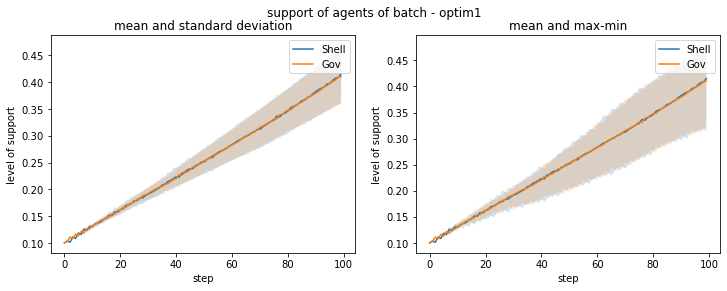

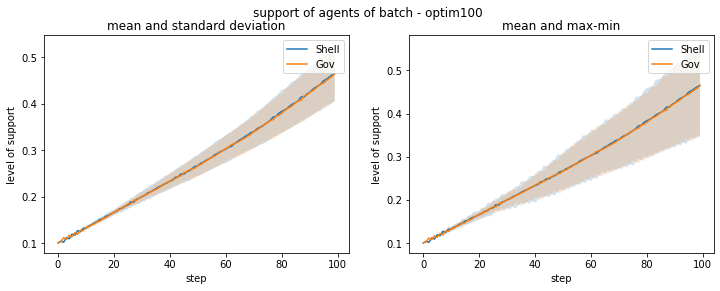

In [71]:
# loop over all versions
for version in versions:
    fig = plt.figure(fig_count, figsize=(12, 4))
    plots.append(fig)
    fig_count += 1
    # create two axes
    ax = [fig.add_subplot(121), fig.add_subplot(122)]
    # loop over each agent
    for key in config['agents']:#['Shell', 'Gov']:
        # calculate mean and std for support
        mean = states[version][key].mean(axis=0)[:, 0]
        std = states[version][key].std(axis=0)[:, 0]
        x = range(0, states[version][key].shape[1])
        # plot mean
        ax[0].plot(mean, label=key)
        ax[1].plot(mean, label=key)
        # plot std as an area
        ax[0].fill_between(x, mean+std, mean-std, alpha=0.2)
        # plot max and min as an area
        ax[1].fill_between(x, states[version][key].max(axis=0)[:, 0],
                           states[version][key].min(axis=0)[:, 0], alpha=0.2)
    # set some plot properties
    fig.suptitle('support of agents of batch - ' + version)
    ax[0].set_title('mean and standard deviation')
    ax[1].set_title('mean and max-min')
    for axis in fig.get_axes():
        axis.set_xlabel('step')
        axis.set_ylabel('level of support')
        axis.legend()

<h2><center>plots for resource assignment</center></h2>

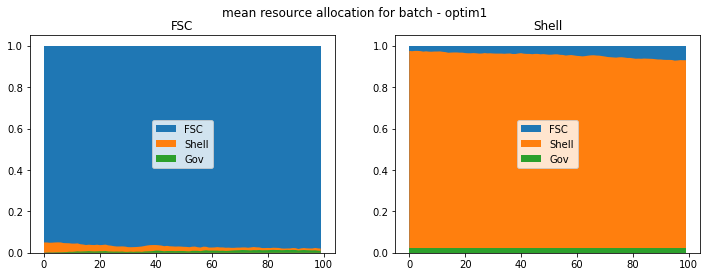

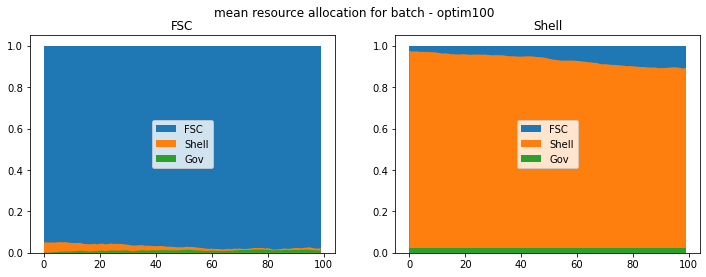

In [72]:
for version in versions:
    fig = plt.figure(fig_count, figsize=(12, 4))
    plots.append(fig)
    # create new axes
    ax = [fig.add_subplot(121), fig.add_subplot(122)]
    fig_count += 1

    for i, key in enumerate(config['active_agents']):
        # calculate mean of resource assignment to the different partner agents
        x = range(0, states[version][key].shape[1])
        fsc = states[version][key].mean(axis=0)[:, 1]
        shell = states[version][key].mean(axis=0)[:, 2]
        gov = states[version][key].mean(axis=0)[:, 3]

        # create stacked plots
        ax[i].stackplot(x, gov + shell + fsc)
        ax[i].stackplot(x, gov + shell)
        ax[i].stackplot(x, gov)
        ax[i].set_title(key)
        ax[i].legend(['FSC', 'Shell', 'Gov'], loc='center')
    fig.suptitle('mean resource allocation for batch - ' + version)

<h2><center>plots for support calculation</center></h2>

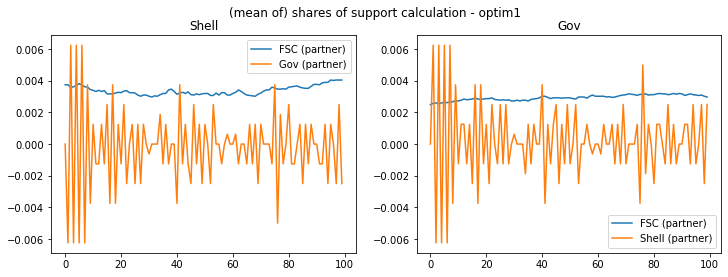

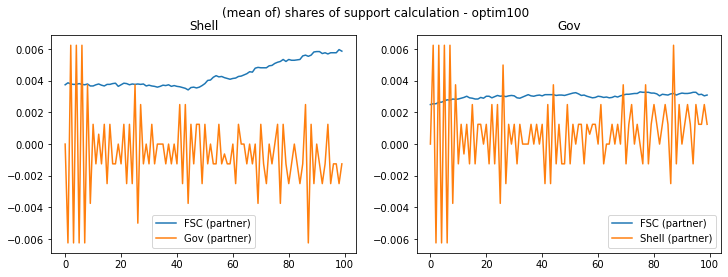

In [74]:
# %matplotlib notebook
# %matplotlib inline
support_calc = dict()
par_agt = {'Shell': ['FSC', 'Gov'], 'Gov': ['FSC', 'Shell']}
for version in versions:
    # load data
    support_calc.update({version: torch.load(LOAD_DIR / ('support_calc_' + version))})
    # create figure and axis
    fig = plt.figure(fig_count, figsize=(12, 4))
    fig.suptitle('(mean of) shares of support calculation - ' + version)
    plots.append(fig)  
    fig_count += 1
    ax = [fig.add_subplot(121), fig.add_subplot(122)]
    
    for i, key in enumerate(support_calc[version].keys()):
        x = range(0, support_calc[version][key].shape[1])
        mean = support_calc[version][key].mean(axis=0)[:, :]               
#         ax[i].plot(mean[:,0], label='support before' ) # oder raus
        ax[i].plot(mean[:,1], label= par_agt[key][0] + ' (partner)')
        ax[i].plot(mean[:,2], label= par_agt[key][1] + ' (partner)')
        ax[i].legend()
        ax[i].set_title(key)
    

In [75]:
# support von Gov ist genau das gespiegelte von Shell
support_calc[version]['Gov'].mean(axis=0)[:, :][:,2] + support_calc[version]['Shell'].mean(axis=0)[:, :][:,2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<h2><center>plots for shell reward calculation</center></h2>

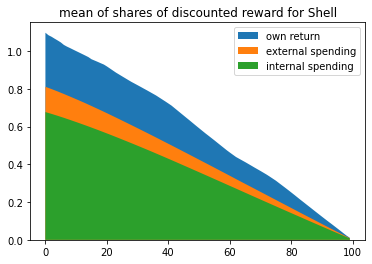

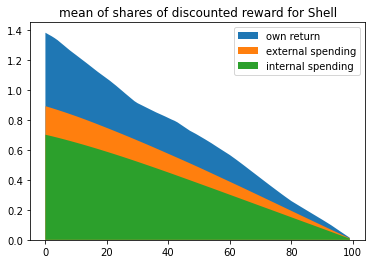

In [76]:
reward_shell = dict()
for version in versions:
    # load data
    reward_shell.update({version: torch.load(LOAD_DIR / ('reward_shell_calc_' + version))})
    fig = plt.figure(fig_count)
    fig_count += 1
    ax = fig.add_subplot(111)
    
    mean = reward_shell[version].mean(axis=0)[:, :]
    x = range(0, reward_shell[version].shape[1])
    
    # create stacked plots
    ax.stackplot(x, mean[:, 3] + mean[:, 2] + mean[:, 1])
    ax.stackplot(x, mean[:, 3] + mean[:, 2])
    ax.stackplot(x, mean[:, 3])
    
    # axis properties
    ax.legend(['own return', 'external spending', 'internal spending'])
    ax.set_title('mean of shares of discounted reward for Shell')

In [68]:
5


5

<h2><center>saving plots to pdf or svg</center></h2>

In [56]:
plots

[<Figure size 864x288 with 2 Axes>,
 <Figure size 864x288 with 2 Axes>,
 <Figure size 864x288 with 2 Axes>,
 <Figure size 864x288 with 2 Axes>]

In [19]:
plots[0].savefig((LOAD_DIR / (versions[0] + '.pdf'))) # svg auch möglich